In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

<h1><center>Boosting</center></h1>

### Recap Lecture

## Linear ensembles

$$
F(x)=f_{0}(x)+\alpha_{1}h_{1}(x)+...+\alpha_{M}h_{M}(x)
$$

**Regression:** $\widehat{y}(x)=F(x)$

**Binary classification:** $score(y|x)=F(x),\,\widehat{y}(x)= sign(F(x))$
* Notation: $h_{1}(x),...h_{M}(x)$ are called *base learners, weak learners, base models*.
* Too expensive to optimize $f_{0}(x),h_{1}(x),...h_{M}(x)$ and $\alpha_{1},...\alpha_{M}$ jointly for large $M$.
* May lead to overfitting
* Idea: optimize $f_{0}(x)$ and then each pair $(h_{m}(x),\,\alpha_{m})$ greedily.

**Input**: 
* training dataset $(x_{i},y_{i}),\,i=1,2,...N$; 
* loss function $\mathcal{L}(f,y)$,
* general form of "base learner" $h(x|\gamma)$ (dependent from parameter $\gamma$) 
* number $M$ of successive additive approximations.

**ALGORITHM**:
1. Fit initial approximation $f_{0}(x)=\arg\min_{f}\sum_{i=1}^{N}\mathcal{L}(f(x_{i}),y_{i})$ 
2. For $m=1,2,...M$:

    1. find next best classifier
$$
(\alpha_{m},h_{m})=\arg\min_{h,c}\sum_{i=1}^{N}\mathcal{L}(f_{m-1}(x_{i})+\alpha h(x_{i}),\,y_{i})
$$
    2. set
$$
f_{m}(x)=f_{m-1}(x)+\alpha_{m}h_{m}(x)
$$
**Output**: approximation function $f_{M}(x)=f_{0}(x)+\sum_{m=1}^{M}\alpha_{m}h_{m}(x)$

# AdaBoost

## Adaboost (discrete version): assumptions

* binary classification task $y\in\{+1,-1\}$
* family of base classifiers $h(x)=h(x|\gamma)$ where $\gamma$ is some fixed parametrization.
* $h(x)\in\{+1,-1\}$
* classification is performed with $\widehat{y}=sign\{f_{0}(x)+\alpha_{1}f_{1}(x)+...+\alpha_{M}f_{M}(x)\}$
* optimized loss is $\mathcal{L}(y,f(x))=e^{-yf(x)}$

## Adaboost (discrete version): algorithm

**Input**: training dataset $(x_{i},y_{i}),\,i=1,2,...n$; number of additive weak classifiers $M$, a family of weak classifiers $h(x)\in\{+1,-1\}$, trainable on weighted datasets.

**ALGORITHM**:
1. Initialize observation weights $w_{i}=1/n$, $i=1,2,...n$.
2. for $m=1,2,...M$:

    1. fit $h^{m}(x)$ to training data using weights $w_{i}$
    2. compute weighted misclassification rate:
$$
E_{m}=\sum_{i=1}^{N}w_{i}\mathbb{I}[h^{m}(x_i)\ne y_{i}]
$$
    4. compute $\alpha_{m}=\frac{1}{2}\ln\left((1-E_{m})/E_{m}\right)$
    5. update sample weights:
$$
w_{i}\leftarrow \frac{w_{i}e^{-\alpha_{m}y_i h^{m}(x_i)}}{W},$$
Where $W$ is normalization factor $\left(W = \sum_i w_i e^{-\alpha_m y_i h^m(x_i)}\right)$


**Output**: composite classifier $f(x)=sign\left(\sum_{m=1}^{M}\alpha_{m}h^{m}(x)\right)$

### Formula for alpha

On m step our task to minimize exponential loss. Let's write this

$$
L = \sum\limits_{i=1}^N e^{-y_i \cdot f(x_i)} =  \sum\limits_{i=1}^N e^{-y_i \cdot (h_0(x_i) + \alpha_1h_1(x_i) + \alpha_2h_2(x_i) + \ldots + \alpha_mh_m(x_i))} = \sum\limits_{i=1}^N w_i^m e^{-y_i \alpha_m h_m(x_i)}
$$

Where
$$
w_i^m = e^{-y_i \left(h_0(x_i) + \sum\limits_{k=1}^{m-1}\alpha_k h_k(x_i)\right)}
$$

Let's calc derivative

$$
\frac{\partial L}{\partial \alpha_m} = -\sum\limits_{i=1}^N w_i^m e^{-y_i\alpha_m h_m(x_i)} y_i h_m(x_i) = 0
$$

Rewrite, we use that $h_m(x_i) = \{-1; 1\}$

$$
\sum\limits_{i=1}^N w_i^m e^{-y_i\alpha_m h_m(x_i)} y_i h_m(x_i) = \sum\limits_{i=1 : h_m(x_i) = y_i}^N w_i^m e^{-\alpha_m} - \sum\limits_{i=1 : h_m(x_i) \ne y_i}^N w_i^m e^{\alpha_m} = 0 \rightarrow \sum\limits_{i=1 : h_m(x_i) = y_i}^N w_i^m e^{-\alpha_m} = \sum\limits_{i=1 : h_m(x_i) \ne y_i}^N w_i^m e^{\alpha_m}
$$

Mul on $e^{\alpha_m}$

$$
\sum\limits_{i=1 : h_m(x_i) = y_i}^N w_i^m = \sum\limits_{i=1 : h_m(x_i) \ne y_i}^N w_i^m e^{2\alpha_m} \rightarrow
\alpha_2 = \frac{1}{2}\ln \left[\frac{\sum_{i=1}^{N}w_{i}\mathbb{I}[h^{m}(x_i) = y_{i}]}{\sum_{i=1}^{N}w_{i}\mathbb{I}[h^{m}(x_i)\ne y_{i}]} \right] = \frac{1}{2}\ln\left[\frac{1-E_{m}}{E_{m}}\right]
$$ 

### Simple Implementation

How use trees with weights?

You know when you build tree you find best split by criteria

$$
\max\left[I(U)- \left(\frac{|U_l|}{|U|}I(U_l) + \frac{|U_r|}{|U|}I(U_r)\right)\right]
$$

for example $I(U)$ - entropy

In weight case (we assume $\sum\limits_{i=1}^nw_i = 1$)

$$
    |U| = \sum_{i=1 : x_i \in U}^N w_i, ~ and ~ I(U) = -p\log_2(p) - (1-p)\log_2(1-p), ~ where ~ p = \frac{\sum\limits_{i=1 : x_i \in U, y_i = 1}^n w_i}{|U|}
$$

Comment:
unweight case is equivalent when all weights = 1 / n

In [2]:
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm_notebook

In [3]:
class AdaBoostClassifier(object):
    def __init__(self, base_estimator, n_estimators = 100):
        self.base_estimator = base_estimator   # базовый классификатор
        self.n_estimators = n_estimators # их количество
    
    def fit(self, X, y):    # обучение
        from sklearn.base import clone
        weights = np.ones(X.shape[0], dtype=float) / X.shape[0]   # начальные веса объектов Х 
        self.estimators = []
        self.alphas = []
        for i in tqdm_notebook(range(self.n_estimators)):   # цикл по деревьям
            estimator = clone(self.base_estimator)       # генерируем другие деревья  
            estimator.fit(X, y, sample_weight = weights) # fit переданного дерева
            
            error_index = y != estimator.predict(X)  # pridict дерева 
            error = np.sum(weights[error_index])

            alpha = 0.5 * np.log((1 - error) / error) 
            self.estimators.append(estimator)
            self.alphas.append(alpha)
            
            weights = self._update_weights(weights, estimator, alpha, X, y) # обновление весов деревьев
            
    def predict(self, X):       
        res = np.zeros(X.shape[0])
        for estimator, alpha in zip(self.estimators, self.alphas):  # для каждой пары дерево-вес альфа
            res += alpha * estimator.predict(X)
        return np.sign(res)
    
    def predict_proba(self, X): # вероятность 1 или 0
        res = np.zeros(X.shape[0])
        for estimator, alpha in zip(self.estimators, self.alphas):
            res += alpha * estimator.predict_proba(X)
        return res
    
    def predict_top_n(self, X, n):  # берет первые n деревьев (для просмотра того, как улучшается качество бустинга)
        res = np.zeros(X.shape[0])
        for estimator, alpha in zip(self.estimators[:n], self.alphas[:n]):
            res += alpha * estimator.predict_proba(X)
        return np.sign(res)
    
    def predict_proba_top_n(self, X, n): 
        res = np.zeros(X.shape[0])
        for estimator, alpha in zip(self.estimators[:n], self.alphas[:n]):
            res += alpha * estimator.predict(X)
        return res
    
    
    def _update_weights(self, weights, estimator, alpha, X, y):
        weights *= np.exp(-estimator.predict(X) * y * alpha)
        return weights

### Load dataset

It is necessary to predict whether the player will remain in the online game or leave it.

Data Description:

* maxPlayerLevel - the maximum level of the game that the player passed;
* numberOfAttemptedLevels - the number of levels the player tried to go through;
* attemptsOnTheHighestLevel - the number of attempts made at the highest level;
* totalNumOfAttempts - total number of attempts;
* averageNumOfTurnsPerCompletedLevel - the average number of moves completed at successfully completed levels;
* doReturnOnLowerLevels - whether the player made returns to the game at already completed levels;
* numberOfBoostersUsed - the number of boosters used;
* fractionOfUsefullBoosters - the number of boosters used during successful attempts (the player passed the level);
* totalScore - the total number of points scored;
* totalBonusScore - total number of bonus points scored;
* totalStarsCount - total number of stars scored;
* numberOfDaysActuallyPlayed - the number of days when the user played the game.

In [23]:
import pandas as pd
df_X = pd.read_csv('https://raw.githubusercontent.com/shestakoff/hse_se_ml/master/2020/s11-boosting/data/x_train.csv', sep=';')
df_y = pd.read_csv('https://raw.githubusercontent.com/shestakoff/hse_se_ml/master/2020/s11-boosting/data/y_train.csv', sep=';', header=None,
                  names=['target'])
df_X.head()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
0,39,10,3,17,24.444444,1,5,0.400000,2650000,1375,21,2
1,21,22,19,55,17.045455,1,6,0.333333,5614000,3825,51,4
2,5,6,1,6,8.400000,0,1,1.000000,857000,1150,14,1
3,21,2,5,6,19.000000,0,1,0.000000,120000,0,1,1
4,4,5,1,5,9.600000,0,1,1.000000,857000,1075,12,1


In [24]:
df_y.head()

,target
0,0
1,1
2,1
3,1
4,0


In [25]:
X = df_X.values
y = df_y.values.reshape(-1)
print('Zero class count = {}'.format(y.shape[0] - np.sum(y)), 'One class count = {}'.format(np.sum(y)))
y[y== 0] -= 1

Zero class count = 18001 One class count = 7288


### Fit and predict

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=123, test_size=0.2)

In [9]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), 
                         n_estimators=300)

In [28]:
ada.fit(X_train, y_train)

/Users/leyla/opt/anaconda3/envs/hse_se_ml/lib/python3.6/site-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


In [29]:
from sklearn.metrics import roc_auc_score

In [30]:
train_auc = []
val_auc = []
for i in tqdm_notebook(range(1, 301, 1)):
    train_auc.append(roc_auc_score(y_train, ada.predict_proba_top_n(X_train, i)))
    val_auc.append(roc_auc_score(y_valid, ada.predict_proba_top_n(X_valid, i)))
    if i % 100 == 0:
        print("Accuracy with {} estimators:".format(i))
        print('\t Train  = {}'.format(train_auc[-1]))
        print('\t Val  = {}'.format(val_auc[-1]))

/Users/leyla/opt/anaconda3/envs/hse_se_ml/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy with 100 estimators:
	 Train  = 0.8615384318701849
	 Val  = 0.8520388782900794
Accuracy with 200 estimators:
	 Train  = 0.8615384318701849
	 Val  = 0.8520388782900794
Accuracy with 300 estimators:
	 Train  = 0.8615384318701849
	 Val  = 0.8520388782900794



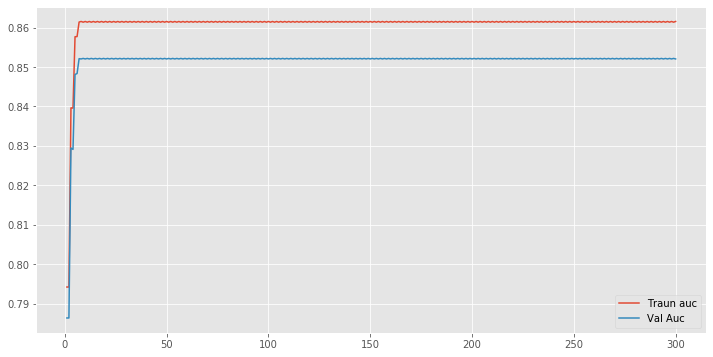

In [31]:
plt.plot(range(1, 301, 1), train_auc, label = 'Traun auc')
plt.plot(range(1, 301, 1), val_auc, label = 'Val Auc')
plt.legend(loc = 'best')

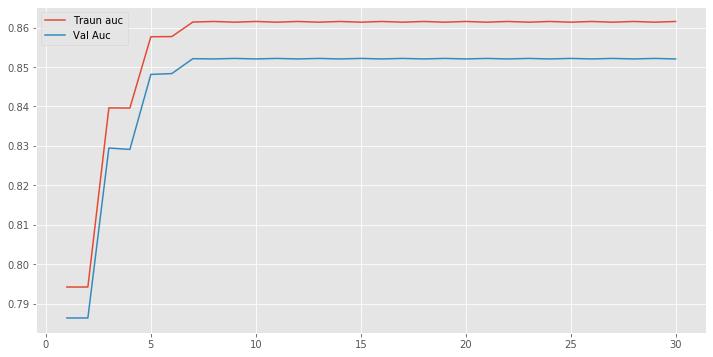

In [32]:
plt.plot(range(1, 31, 1), train_auc[:30], label = 'Traun auc')
plt.plot(range(1, 31, 1), val_auc[:30], label = 'Val Auc')
plt.legend(loc = 'best')

# Gradient boosting

## Gradient boosting

* Now consider $F\left(f(x_{1}),...f(x_{N})\right)=\sum_{n=1}^{N}\mathcal{L}\left(f(x_{n}),y_{n}\right)$
* Gradient descent performs pointwise optimization, but we need generalization, so we optimize in space of functions.
* Gradient boosting implements modified gradient descent in function space:
    * find $z_{i}=-\frac{\partial\mathcal{L}(r,y_{i})}{\partial r}|_{r=f^{m-1}(x_{i})}$
    * fit base learner $h_{m}(x)$ to $\left\{ (x_{i},z_{i})\right\} _{i=1}^{N}$

## Gradient boosting algorithm

**Input**: training dataset $(x_{i},y_{i}),\,i=1,2,...N$; loss function $\mathcal{L}(f,y)$; learning rate $\nu$ and the number $M$ of successive additive approximations.

1. Fit initial approximation $f_{0}(x)$ (might be taken $f_{0}(x)\equiv0$)
2. For each step $m=1,2,...M$:

    1. calculate derivatives $z_{i}=-\frac{\partial\mathcal{L}(r,y_{i})}{\partial r}|_{r=f^{m-1}(x_{i})}$
    2. fit $h_{m}$ to $\{(x_{i},z_{i})\}_{i=1}^{N}$, for example by solving
$$
\sum_{n=1}^{N}(h_{m}(x_{n})-z_{n})^{2}\to\min_{h_{m}}
$$
    4. set $f_{m}(x)=f_{m-1}(x)+\nu h_{m}(x)$


**Output**: approximation function $f_{M}(x)=f_{0}(x)+\sum_{m=1}^{M}\nu h_{m}(x)$

### Examples

##### Regression

Loss function is MSE ($ r_i = f(x_i)$)
$$
MSE(r_i, y_i) = L(r_i, y_i) =  (r_i - y_i)^2 \rightarrow \frac{\partial L}{\partial r} = 2(r_i - y_i)
$$

So on each iteration we solve regression task
$$
x_i \rightarrow -(r_{i} - y_i)
$$


#### Classification
Loss function is log_loss ($ r_i = f(x_i) = \langle w, x_i \rangle$)
$$
log\_loss(r_i, y_i) = L(r_i, y_i) = log(1 + exp(- r_i y_i)) \rightarrow \frac{\partial L}{\partial r} = \frac{-exp(- r_i y_i) \cdot y_i}{1 + exp(- r_i y_i) }
$$

So on each iteration we solve regression task
$$
x_i \rightarrow \frac{exp(- r_i y_i) \cdot y_i}{1 + exp(- r_i y_i) }
$$

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

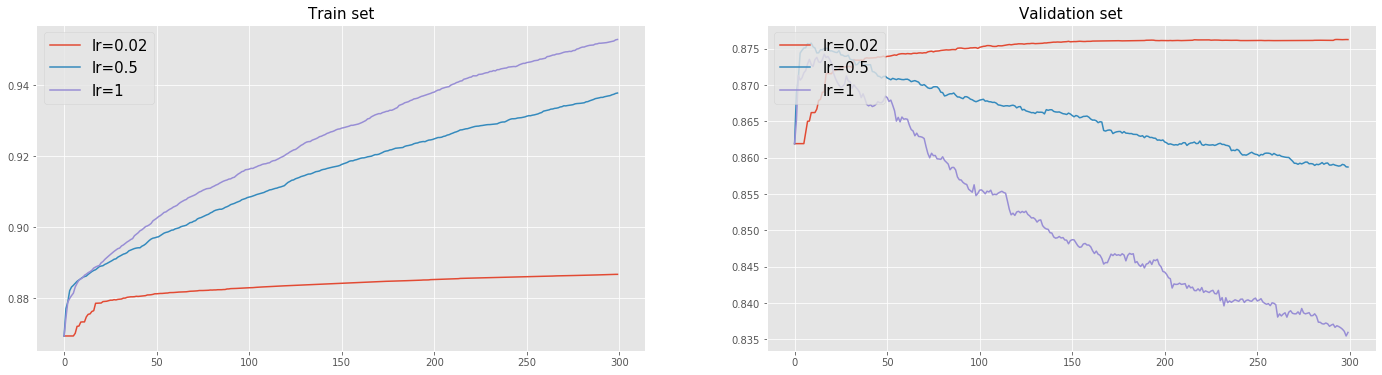

In [34]:
plt.rcParams['figure.figsize'] = (24, 6)

fig, ax = plt.subplots(1,2)
for lr in [0.02, 0.5, 1]:

    model = GradientBoostingClassifier(n_estimators=300, max_depth=3,
                                       learning_rate=lr, 
                                       random_state=123)
    model.fit(X_train, y_train)

    scores_train = []
    scores_valid = []

    for y_pred in model.staged_predict_proba(X_train):
        scores_train.append(roc_auc_score(y_train, y_pred[:, 1]))
        
    ax[0].plot(scores_train, label='lr={}'.format(lr))
    ax[0].set_title('Train set', size = 15)
    ax[0].legend(loc = 'upper left', prop={'size': 15})

    for y_pred in model.staged_predict_proba(X_valid):
        scores_valid.append(roc_auc_score(y_valid, y_pred[:, 1])) 
        
    ax[1].plot(scores_valid, label='lr={}'.format(lr))
    ax[1].set_title('Validation set', size = 15)
    ax[1].legend(loc = 'upper left', prop={'size': 15})

## Partial dependence plots

Partial dependence plots (PDP) show the dependence between the target response and a set of ‘target’ features, marginalizing over the values of all other features (the ‘complement’ features). Intuitively, we can interpret the partial dependence as the expected target response as a function of the ‘target’ features.

Due to the limits of human perception the size of the target feature set must be small (usually, one or two) thus the target features are usually chosen among the most important features.

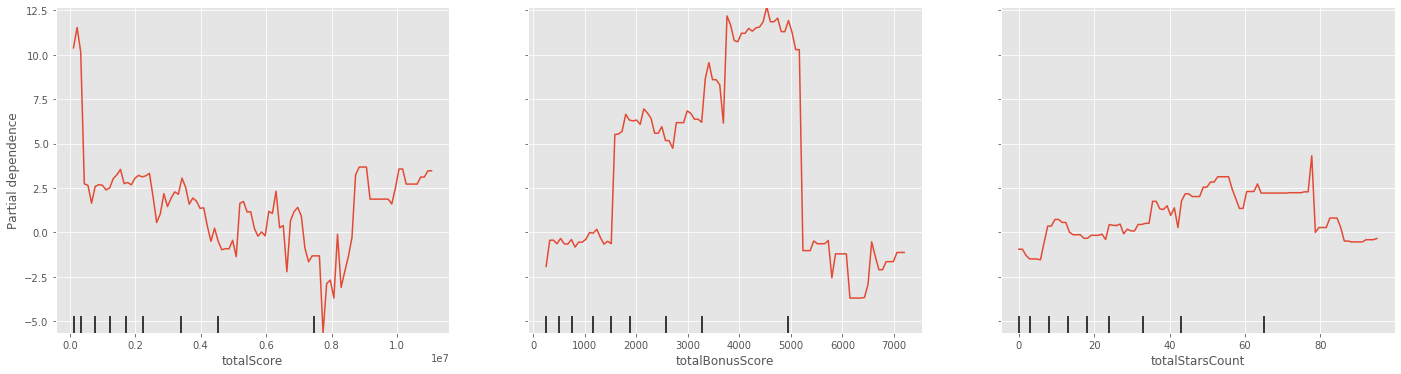

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import plot_partial_dependence

clf = GradientBoostingClassifier(n_estimators=300, max_depth=3,
                                       learning_rate=1.0, 
                                       random_state=123).fit(X_train, y_train)

all_features = [
    "maxPlayerLevel", "numberOfAttemptedLevels", 
    "attemptsOnTheHighestLevel", "totalNumOfAttempts", 
    "averageNumOfTurnsPerCompletedLevel", "doReturnOnLowerLevels", 
    "numberOfBoostersUsed", "fractionOfUsefullBoosters", 
    "totalScore", "totalBonusScore", 
    "totalStarsCount", "numberOfDaysActuallyPlayed"
    ]

features_ow = ["totalScore", "totalBonusScore", "totalStarsCount"]

df_X_train = pd.DataFrame(X_train,
                            columns=all_features)

plot_partial_dependence(clf, df_X_train, features_ow) 

One-way PDPs tell us about the interaction between the target response and the target feature (e.g. linear, non-linear).

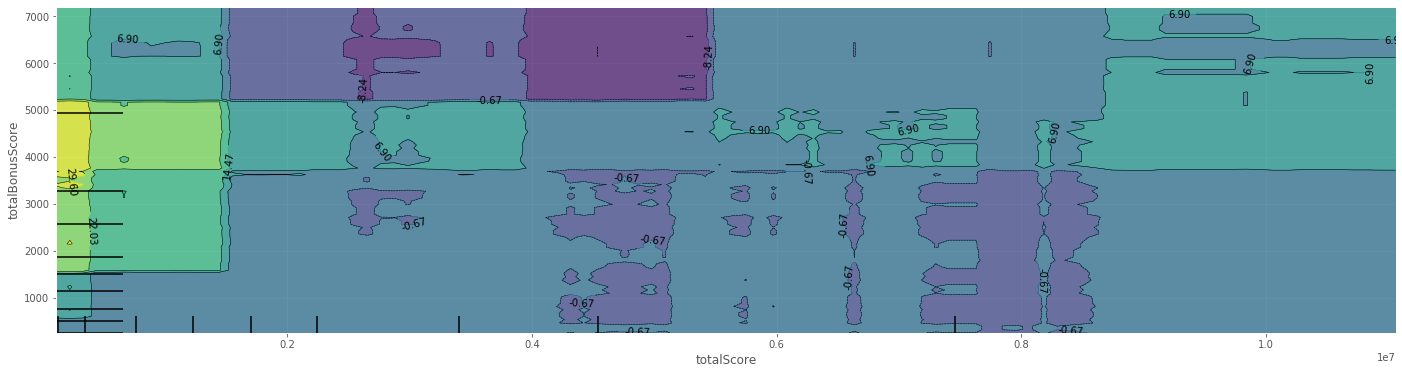

In [19]:
features_tw = [("totalScore", "totalBonusScore")]

plot_partial_dependence(clf, df_X_train, features_tw) 

PDPs with two target features show the interactions among the two features.

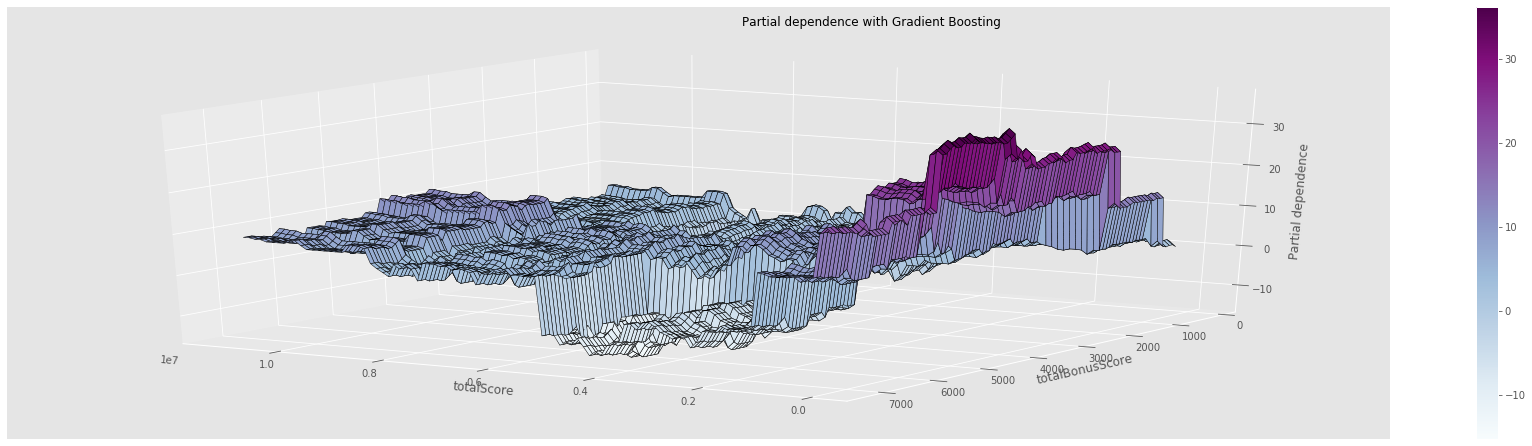

In [20]:
from sklearn.inspection import partial_dependence
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

features = ("totalScore", "totalBonusScore")
pdp, axes = partial_dependence(clf, df_X_train, features=features, grid_resolution=100)

XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel('Partial dependence')


ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence with Gradient Boosting')
plt.subplots_adjust(top=0.9)

plt.show()